# Test Plant #

Mostly to make sure everything is connected

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from aquaponics import Aquaponics
imode = 4

## 1 bed 1 plant - no nitrogen ##

In [2]:
a = Aquaponics('plant', kswitch=100)
m = a.get_model()

tf = 45
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)

a.solve(glamdring=True, imode=imode, disp=True)

apmonitor 192.168.17.25_585953537 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           24
   Intermediates:           11
   Connections  :            0
   Equations    :           19
   Residuals    :            8
 
 Number of state variables:           5400
 Number of total equations: -         5400
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program cont

  95r 0.0000000e+00 2.49e-01 4.79e+02  -5.2 2.88e-02   3.7 1.00e+00 3.33e-02f  1
  96r 0.0000000e+00 2.49e-01 6.23e+02  -5.5 8.57e-03   4.1 1.00e+00 2.03e-01f  1
  97r 0.0000000e+00 2.49e-01 5.91e+02  -5.2 3.85e-02   3.6 1.00e+00 5.77e-02f  1
  98r 0.0000000e+00 2.49e-01 5.30e+02  -5.6 9.58e-03   4.0 1.00e+00 1.07e-01f  1
  99r 0.0000000e+00 2.49e-01 5.08e+02  -5.0 5.83e-02   3.6 1.00e+00 4.11e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100r 0.0000000e+00 2.49e-01 4.18e+02  -5.6 1.03e-02   4.0 1.00e+00 1.78e-01f  1
 101r 0.0000000e+00 2.49e-01 8.61e+02  -3.7 2.86e-01   3.5 1.00e+00 3.07e-02f  1
 102r 0.0000000e+00 2.49e-01 3.63e+02  -3.7 1.35e-02   3.9 1.00e+00 1.05e-01f  1
 103r 0.0000000e+00 2.49e-01 6.79e+02  -2.5 5.20e-03   4.4 1.00e+00 3.94e-01f  1
 104r 0.0000000e+00 2.49e-01 3.30e+02  -2.9 1.39e-02   3.9 1.00e+00 6.22e-02f  1
 105r 0.0000000e+00 2.49e-01 1.05e+02  -2.9 5.27e-03   4.3 1.00e+00 6.57e-01f  1
 106r 0.0000000e+00 2.49e-01

 232r 0.0000000e+00 2.49e-01 4.45e+02  -5.1 2.31e-01   3.3 1.00e+00 4.40e-02f  1
 233r 0.0000000e+00 2.49e-01 8.51e+01  -5.4 1.50e-02   3.7 1.00e+00 2.20e-02f  1
 234r 0.0000000e+00 2.49e-01 2.68e+02  -4.7 5.48e-03   4.2 1.00e+00 4.02e-01f  1
 235r 0.0000000e+00 2.49e-01 4.29e+02  -4.6 1.48e-02   3.7 1.00e+00 8.15e-02f  1
 236r 0.0000000e+00 2.49e-01 4.15e+02  -4.6 5.65e-03   4.1 9.52e-01 1.73e-01f  1
 237r 0.0000000e+00 2.49e-01 1.47e+02  -4.8 1.63e-02   3.6 9.77e-01 1.18e-01f  1
 238r 0.0000000e+00 2.49e-01 2.36e+02  -4.3 6.07e-03   4.1 1.00e+00 2.99e-01f  1
 239r 0.0000000e+00 2.49e-01 4.81e+02  -4.3 2.01e-02   3.6 1.00e+00 8.13e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240r 0.0000000e+00 2.49e-01 2.49e+02  -4.8 6.21e-03   4.0 1.00e+00 1.67e-02f  1
 241r 0.0000000e+00 2.49e-01 1.58e+02  -4.9 2.31e-02   3.5 1.00e+00 1.53e-01f  1
 242r 0.0000000e+00 2.49e-01 1.46e+02  -5.2 7.09e-03   4.0 1.00e+00 1.27e-01f  1
 243r 0.0000000e+00 2.49e-01

Text(0.5,0,'Time (days)')

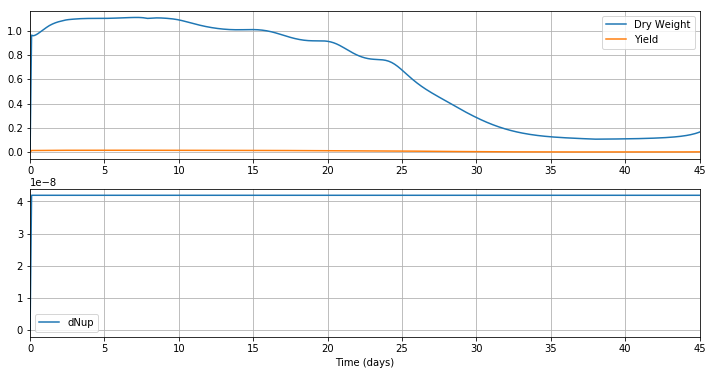

In [3]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, a.w, label='Dry Weight')
plt.plot(m.time, a.y, label='Yield')
plt.grid()
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Test 1 Bed 1 Plant - Nitrogen ##

In [4]:
a = Aquaponics('plant', N0=.1, kswitch=100)
m = a.get_model()

tf = 90
steps = tf * 12 + 1
m.time = np.linspace(0,tf,steps)

start = time()
a.solve(glamdring=True, imode=imode, disp=False)
print('Solved in {:.2f} Seconds'.format(time() - start))

Solved in 103.32 Seconds


Text(0.5,0,'Time (days)')

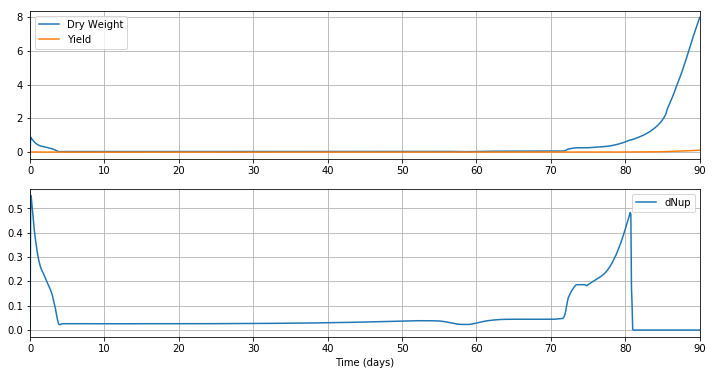

In [5]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, a.w, label='Dry Weight')
plt.plot(m.time, a.y, label='Yield')
plt.grid()
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Test 1 Bed, 30 plants - Nitrogen ##

In [6]:
a = Aquaponics('plant', N0=.1, ppb0=30, kswitch=100)
m = a.get_model()

tf = 90
steps = tf * 12 + 1
m.time = np.linspace(0,tf,steps)

start = time()
a.solve(glamdring=True, imode=imode, disp=False)
print('Solved in {:.2f} Seconds'.format(time() - start))

Solved in 105.70 Seconds


Text(0.5,0,'Time (days)')

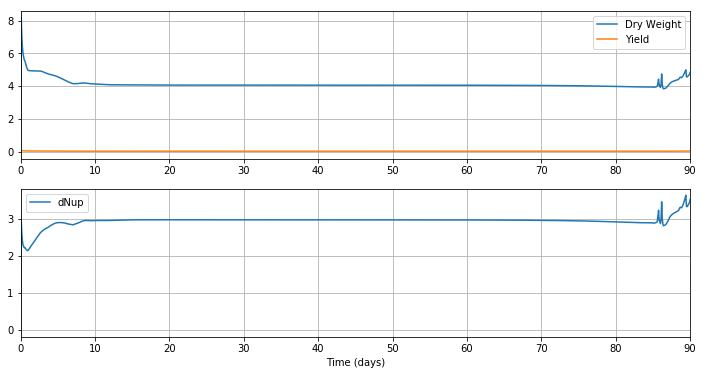

In [7]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, a.w, label='Dry Weight')
plt.plot(m.time, a.y, label='Yield')
plt.grid()
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Test 1 Bed, 30 plants - Nitrogen - Staggered Start##

In [8]:
a = Aquaponics('plant', N0=.1, ppb0=30, beds=[(30, 60)], kswitch=100)
m = a.get_model()

tf = 90
steps = tf * 12 + 1
m.time = np.linspace(0,tf,steps)

start = time()
a.solve(glamdring=True, imode=imode, disp=False)
print('Solved in {:.2f} Seconds'.format(time() - start))

Solved in 110.23 Seconds


Text(0.5,0,'Time (days)')

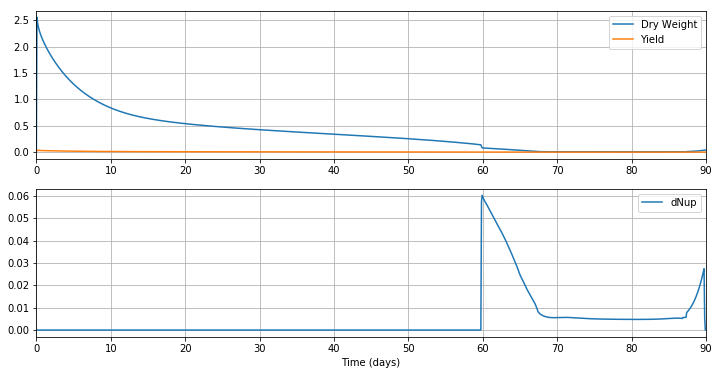

In [9]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, a.w, label='Dry Weight')
plt.plot(m.time, a.y, label='Yield')
plt.grid()
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time (days)')

## Test 3 Beds, 30 plants - Nitrogen - Staggered Starts##

In [10]:
a = Aquaponics('plant', N0=.1, ppb0=30, beds=[(0,30), (30, 60), (60, 90)], kswitch=100)
m = a.get_model()

tf = 90
steps = tf * 12 + 1
m.time = np.linspace(0,tf,steps)

start = time()
a.solve(glamdring=True, imode=imode, disp=False)
print('Solved in {:.2f} Seconds'.format(time() - start))

Solved in 293.99 Seconds


Text(0.5,0,'Time (days)')

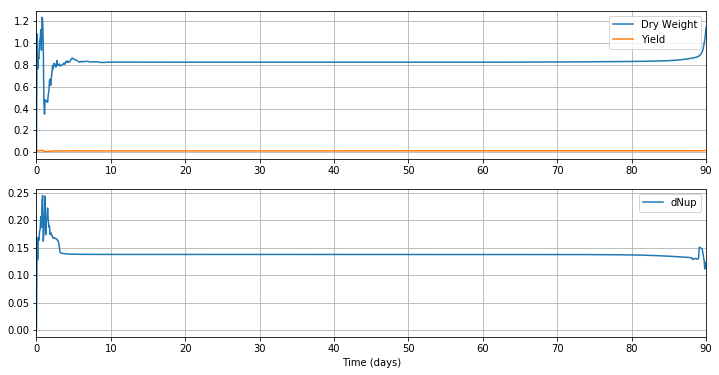

In [11]:
%matplotlib inline
plt.figure(figsize=(12,6))
ax = plt.subplot(211)
plt.plot(m.time, a.w, label='Dry Weight')
plt.plot(m.time, a.y, label='Yield')
plt.grid()
plt.legend()

ax = plt.subplot(212, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time (days)')